# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [7]:
IMAGE_SIZE = 256
CHANNELS = 3

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r"F:\Downloads\archive (19)\PlantVillage",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2152 images belonging to 3 classes.


In [40]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [41]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [42]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.63918996 0.6470331  0.73722917]
  [0.6132247  0.6210678  0.7112639 ]
  [0.59051514 0.5983583  0.68600076]
  ...
  [0.80944663 0.81728977 0.8761133 ]
  [0.8106185  0.8184617  0.87728524]
  [0.8117905  0.81963366 0.8784572 ]]

 [[0.6403619  0.64820504 0.7384012 ]
  [0.6186939  0.626537   0.71673316]
  [0.5862179  0.594061   0.68248487]
  ...
  [0.81806296 0.8259061  0.8847297 ]
  [0.8168911  0.8247342  0.88355774]
  [0.81571907 0.8235622  0.88238573]]

 [[0.64153385 0.649377   0.73957306]
  [0.62416315 0.6320063  0.72220236]
  [0.58192056 0.5897637  0.67896897]
  ...
  [0.8078432  0.8141999  0.8725281 ]
  [0.8078432  0.813028   0.87096536]
  [0.8078432  0.81185603 0.86940277]]

 ...

 [[0.42754227 0.41969913 0.50205207]
  [0.42871422 0.42087108 0.5032241 ]
  [0.42988622 0.42204309 0.504396  ]
  ...
  [0.53667533 0.53275377 0.59549886]
  [0.53487825 0.5309567  0.5937018 ]
  [0.51301074 0.5090892  0.57183427]]

 [[0.41562083 0.4077777  0.49013063]
  [0.41327688 0.40543374 0.48778668]


In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
       r"F:\Downloads\early_blight_1.jpg",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

In [16]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r"F:\Downloads\early_blight_1.jpg",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2385 images belonging to 2 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

## Building the Model

In [18]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\sanja\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
1506/32

47.0625

In [22]:
215/32

6.71875

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

C:\Users\sanja\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5343 - loss: 0.7794 - val_accuracy: 0.6146 - val_loss: 0.6602
Epoch 2/20
28/47 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6209 - loss: 0.6463

C:\Users\sanja\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 958ms/step - accuracy: 0.6329 - loss: 0.6278 - val_accuracy: 0.7969 - val_loss: 0.4721
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8250 - loss: 0.4083 - val_accuracy: 0.8854 - val_loss: 0.2631
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8977 - loss: 0.2856 - val_accuracy: 0.9167 - val_loss: 0.2010
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9470 - loss: 0.1346 - val_accuracy: 0.9688 - val_loss: 0.1195
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 840ms/step - accuracy: 0.9619 - loss: 0.1468 - val_accuracy: 0.9792 - val_loss: 0.0778
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9739 - loss: 0.0820 - val_accuracy: 0.9844 - val_loss: 0.0772
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9899 - loss: 0.0583 - val_accuracy: 0.9740 - val_loss: 0.1163
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9806 - loss: 0.0600 - val_accuracy: 0.9792 - val_loss: 0.0

In [47]:
scores = model.evaluate(test_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9922 - loss: 0.0492


In [48]:
scores

[0.03949562832713127, 0.99245285987854]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [ ]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

20

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.7108442187309265,
 0.6005182266235352,
 0.35949403047561646,
 0.2773180305957794,
 0.11897711455821991]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
val_acc

[0.6145833134651184,
 0.796875,
 0.8854166865348816,
 0.9166666865348816,
 0.96875,
 0.9791666865348816,
 0.984375,
 0.9739583134651184,
 0.9791666865348816,
 0.9947916865348816,
 1.0,
 0.984375,
 0.9947916865348816,
 1.0,
 1.0,
 0.9947916865348816,
 0.9947916865348816,
 1.0,
 0.9739583134651184,
 0.984375]

In [32]:
acc

[0.5580926537513733,
 0.6506696343421936,
 0.8502350449562073,
 0.9040178656578064,
 0.9536601901054382,
 0.9676339030265808,
 0.9778375029563904,
 0.9888392686843872,
 0.9827127456665039,
 0.9943246245384216,
 0.9865681529045105,
 0.9866071343421936,
 0.9946808218955994,
 0.9988649487495422,
 0.9932841062545776,
 0.9966517686843872,
 0.9966755509376526,
 0.9977298378944397,
 0.990026593208313,
 0.9772984981536865]

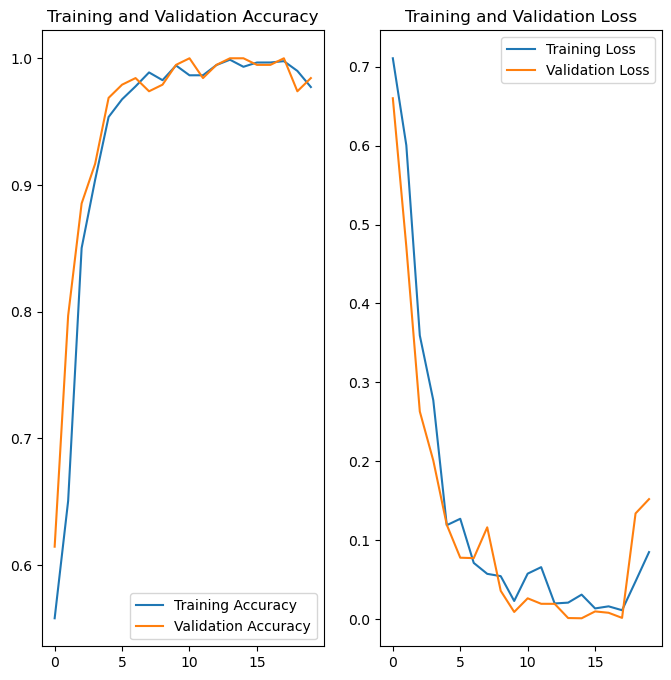

In [33]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted label: Potato___Early_blight


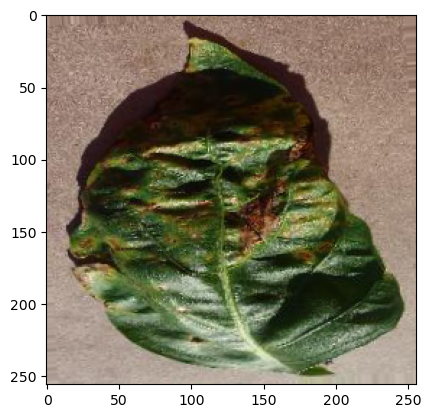

In [49]:
import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # Corrected variable name
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)  # Corrected variable name from `images_batch` to `image_batch`
    print("Predicted label:", class_names[np.argmax(batch_prediction[1])])
    
    break


### Write a function for inference

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


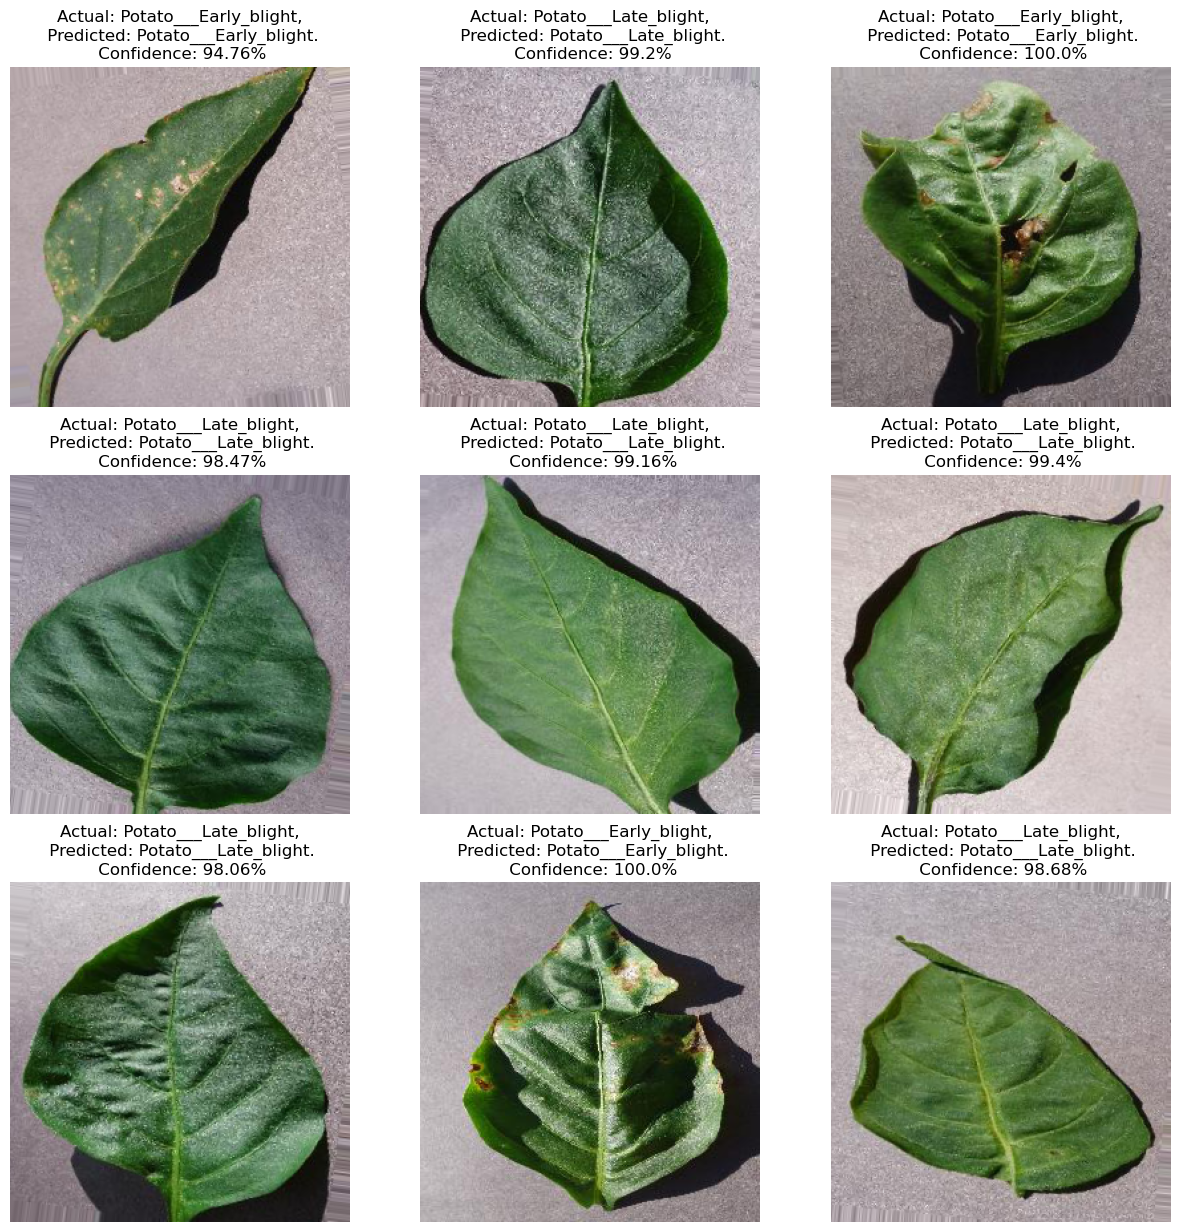

In [61]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [55]:
model.save(f"../models/{model_version}.h5")  # Saves in .h5 format
